# Fashion Recommendation System
We are using [fashion-product-images-dataset](https://www.kaggle.com/paramaggarwal/fashion-product-images-dataset) to create a fashion recomendation system. 


*   The objective of the project is to find similar clothing items as   the input Image


*   We are using **ResNet50** to extract *2048* features from Images.
*   We will also extract the features from input Image.
*   Those **2048** feature will act like 2048 dimentional vector.
Those vectors which are closer to each other will represent similar Images. 
*   We can find top 5 closest vectors to that of our Input Image's vector using techniques like *cosine similarity* and *Euclidean distance*. 
*   Then we will measure **Euclidean distance** and return top 5 Images with sortest distance from to our input Image.



In [ ]:
# upload kaggle api key here
from google.colab import files
files.upload()

In [ ]:
# Environment setup to download datset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dataset doenload
!kaggle datasets download -d paramaggarwal/fashion-product-images-dataset

100% 23.1G/23.1G [07:25<00:00, 107MB/s] 
100% 23.1G/23.1G [07:25<00:00, 55.6MB/s]


In [ ]:
# Unziping the zip file.
import zipfile
zip = zipfile.ZipFile('/content/fashion-product-images-dataset.zip','r') 
zip.extractall('/content')
zip.close()

In [5]:
# Import packages
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
from numpy.linalg import norm
import os
import pickle
import cv2

In [ ]:
# Instanciation ResNet model for Transfer Learning
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224,3))
model.trainable = False
model = tf.keras.models.Sequential([
                                    model,
                                    GlobalMaxPooling2D()
])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# this methord will take image path and return 2048 feature per image
def extract_features(image_path, model):
  img = image.load_img(image_path, target_size=(224, 224))
  img_arr = image.img_to_array(img)
  img_expanded_arr = np.expand_dims(img_arr, axis=0)
  img_preprocessed = preprocess_input(img_expanded_arr)
  result = model.predict(img_preprocessed)
  return result/ norm(result)


In [ ]:
image_paths = []
content_path ="/content/fashion-dataset/fashion-dataset/images"
for file in os.listdir(content_path):
  image_paths.append(os.path.join(content_path, file))

In [ ]:
# Feature_list has features of all imges
feature_list = []
for i, image_path in enumerate(image_paths):
  feature_list.append(extract_features(image_path, model))
  # printing i will help keeping count of images the methord has processed.
  print(i)

In [8]:
np.array(feature_list).shape

(44441, 1, 2048)

In [ ]:
# We can store image path and feature list for future use.
# pickle.dump(image_paths, open('image_paths.pkl', 'wb'))
# pickle.dump(feature_list, open('features.pkl', 'wb'))
# files.download('image_paths.pkl')
# files.download('features.pkl')

In [ ]:
# making the array 3D to 2D
arr1 = np.squeeze(feature_list)

In [ ]:
# Impoirting nearrest neighbore class from sklearn.
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_nexighbors=6, metric='euclidean')
neighbors.fit(arr1)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                 radius=1.0)

In [ ]:
# Image upload for testing the model.
uploaded= files.upload()
index_array = []
for fn in uploaded.keys():
  result = extract_features(fn, model)
  distance, index = neighbors.kneighbors(result)
  index_array.append(index[0])

Saving sweat-shirt.jfif to sweat-shirt.jfif


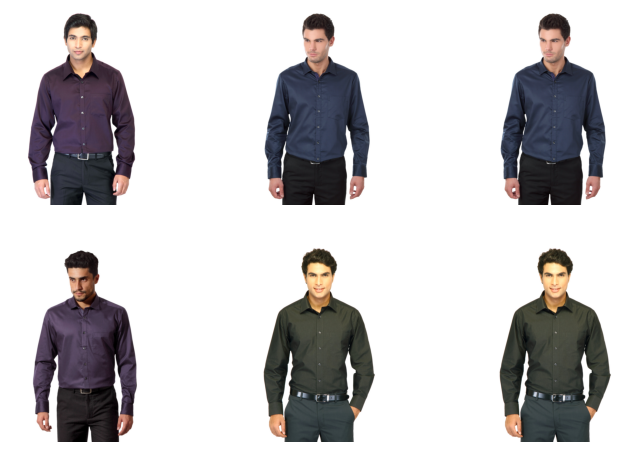

In [ ]:
# Displaying recommended images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.gcf()
fig.set_size_inches(12,8)
for index in index_array:
  for j,i in enumerate(index):
    sp = plt.subplot(2,3,j+1)
    sp.axis('off')
    img = mpimg.imread(image_paths[i])
    plt.imshow(img)
  plt.show()